<center>
    <h1 style="font-weight: bold;">
    Binary Classification from Tabular Data 
    <br>
    </h1>
    <h1>
    (amriz's version)
    </h1>
</center>

## **Library Import**

In [199]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from utils.preprocessing import FeatureScaler, FeatureDimensionReducer

from IPython.display import display, HTML

from collections import Counter

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [200]:
data_path = './data/EV_data.csv'
initial_df = pd.read_csv(data_path)

## **Data Understanding**

### **Deskripsi Data**

Memberikan gambaran umum tentang data yang akan digunakan.

#### **1. Memahami Struktur Data**

In [201]:
# Struktur Data
initial_df.head()

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1


In [202]:
initial_df['read_date'].unique()

array(['3/1/2021', '3/2/2021', '3/3/2021', '3/4/2021', '3/5/2021',
       '3/6/2021', '3/7/2021', '3/8/2021', '3/9/2021', '3/10/2021',
       '3/11/2021', '3/12/2021', '3/13/2021', '3/14/2021', '3/15/2021',
       '3/16/2021', '3/17/2021', '3/18/2021', '3/19/2021', '3/20/2021',
       '3/21/2021', '3/22/2021', '3/23/2021', '3/24/2021', '3/25/2021',
       '3/26/2021', '3/27/2021', '3/28/2021', '3/29/2021', '3/30/2021',
       '3/31/2021', '4/1/2021', '4/2/2021', '4/3/2021', '4/4/2021',
       '4/5/2021', '4/6/2021', '4/7/2021', '4/8/2021', '4/9/2021',
       '4/10/2021', '4/11/2021', '4/12/2021', '4/13/2021', '4/14/2021',
       '4/15/2021', '2/18/2021 0:00', '2/19/2021 0:00', '2/20/2021 0:00',
       '2/21/2021 0:00', '2/22/2021 0:00', '2/23/2021 0:00',
       '2/24/2021 0:00', '2/25/2021 0:00', '2/26/2021 0:00',
       '2/27/2021 0:00', '2/28/2021 0:00', '3/1/2021 0:00',
       '3/2/2021 0:00', '3/3/2021 0:00', '3/4/2021 0:00', '3/5/2021 0:00',
       '3/6/2021 0:00', '3/7/2021 0:00'

In [203]:
print(f"Jumlah data: {initial_df.shape[0]}")
print(f"Jumlah kolom: {initial_df.shape[1]}")
print(initial_df.dtypes)

Jumlah data: 4048
Jumlah kolom: 51
read_date       object
interval_1     float64
interval_2     float64
interval_3     float64
interval_4     float64
interval_5     float64
interval_6     float64
interval_7     float64
interval_8     float64
interval_9     float64
interval_10    float64
interval_11    float64
interval_12    float64
interval_13    float64
interval_14    float64
interval_15    float64
interval_16    float64
interval_17    float64
interval_18    float64
interval_19    float64
interval_20    float64
interval_21    float64
interval_22    float64
interval_23    float64
interval_24    float64
interval_25    float64
interval_26    float64
interval_27    float64
interval_28    float64
interval_29    float64
interval_30    float64
interval_31    float64
interval_32    float64
interval_33    float64
interval_34    float64
interval_35    float64
interval_36    float64
interval_37    float64
interval_38    float64
interval_39    float64
interval_40    float64
interval_41    float64

#### **2. Menentukan Variabel Target**

In [204]:
numerical_columns = initial_df.select_dtypes(include=[np.float64]).columns
categorical_columns = ['id']
date_columns = ['read_date']
label_column = ['label']

#### **3. Memeriksa Nilai Ringkasan Statistik**

In [205]:
# Statistik Deskriptif Numerikal
display(HTML(initial_df.describe().to_html()))

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,interval_11,interval_12,interval_13,interval_14,interval_15,interval_16,interval_17,interval_18,interval_19,interval_20,interval_21,interval_22,interval_23,interval_24,interval_25,interval_26,interval_27,interval_28,interval_29,interval_30,interval_31,interval_32,interval_33,interval_34,interval_35,interval_36,interval_37,interval_38,interval_39,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
count,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.00000,4048.000000
mean,0.344301,0.320546,0.297221,0.276360,0.255266,0.244258,0.250251,0.251163,0.255017,0.230583,0.217867,0.238736,0.257309,0.295889,0.288309,0.283624,0.283028,0.272364,0.263760,0.260320,0.251750,0.251437,0.250036,0.258450,0.251384,0.261171,0.260740,0.261707,0.265499,0.275546,0.282772,0.293687,0.312935,0.340652,0.374661,0.399541,0.422568,0.432408,0.426493,0.422762,0.407895,0.402141,0.392470,0.367511,0.359634,0.341184,0.381160,0.365073,44.50000,0.500000
std,0.698534,0.655992,0.607303,0.554286,0.492384,0.461366,0.598976,0.606699,0.616976,0.426445,0.388668,0.342023,0.328390,0.405575,0.380756,0.400106,0.430066,0.447352,0.471054,0.461368,0.462819,0.479617,0.475716,0.482956,0.478675,0.516921,0.523557,0.516714,0.516509,0.537958,0.541808,0.537004,0.533615,0.552876,0.622922,0.627571,0.632085,0.625359,0.620732,0.629121,0.587563,0.593329,0.607965,0.577805,0.614594,0.622205,0.773924,0.745274,25.40491,0.500062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,0.073000,0.072000,0.070000,0.069000,0.066000,0.066000,0.064000,0.066000,0.064000,0.065000,0.068000,0.074000,0.086000,0.087500,0.075000,0.061750,0.050000,0.043000,0.031200,0.025000,0.025000,0.018925,0.018700,0.018700,0.012500,0.012500,0.012500,0.018700,0.020425,0.025000,0.035000,0.037500,0.043700,0.060000,0.072000,0.093700,0.112500,0.120000,0.127000,0.125000,0.121000,0.118700,0.113000,0.105000,0.088000,0.081200,0.077000,0.075000,22.75000,0.000000
50%,0.137500,0.131200,0.125000,0.125000,0.125000,0.118700,0.118700,0.118700,0.118700,0.118700,0.118700,0.131200,0.154000,0.168700,0.162500,0.156200,0.150000,0.131200,0.123000,0.115000,0.112500,0.106200,0.107000,0.112500,0.112000,0.110000,0.112500,0.111000,0.112500,0.119000,0.120000,0.125000,0.137000,0.156200,0.175000,0.205000,0.225000,0.247000,0.245000,0.243700,0.228500,0.218700,0.206200,0.195000,0.175000,0.156200,0.150000,0.143700,44.50000,0.500000
75%,0.250000,0.237500,0.225000,0.218700,0.212500,0.208250,0.200000,0.200000,0.206200,0.212000,0.212500,0.243700,0.290000,0.337500,0.333000,0.337500,0.312500,0.293000,0.272000,0.276250,0.256200,0.243700,0.247250,0.250000,0.237500,0.243700,0.238250,0.243175,0.250000,0.269000,0.277000,0.285250,0.309500,0.374250,0.431200,0.468700,0.475000,0.487500,0.487125,0.468700,0.450000,0.431200,0.412500,0.395250,0.352750,0.310250,0.293700,0.266500,66.25000,1.000000
max,8.325000,12.712500,12.400000,12.387500,9.200000,8.350000,12.100000,12.212500,12.200000,12.

In [206]:
# Distribusi Frekuesi Kategorikal
sorted_df = initial_df['id'].value_counts().to_frame().sort_index()
sorted_df.columns = ['frequency']
display(HTML(sorted_df.to_html()))

,frequency
id,
1,46
2,46
3,46
4,46
5,46
6,46
7,46
8,46
9,46


Value Counts for 'label':
  1: 2024 (50.00%)
  0: 2024 (50.00%)


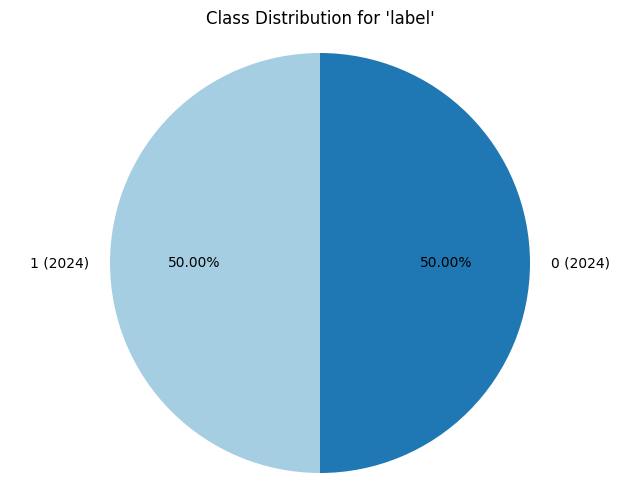

In [207]:
def plot_pie_chart(df, label):
    """
    This function plots a pie chart for the class distribution in the label column
    and prints the value counts for each class in a nicely formatted way, 
    without modifying the original DataFrame.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    label (str): The column name for the label/class to be plotted.
    """
    # Replace NaN with 'NaN' for plotting only, without modifying the original df
    plot_data = df[label].fillna('NaN')

    # Get the value counts of the label
    class_counts = plot_data.value_counts()  # NaN values are replaced with 'Missing'
    total = len(plot_data)

    # Print the value counts with percentages in a more readable format
    print(f"Value Counts for '{label}':")
    for cls, count in class_counts.items():
        percentage = (count / total) * 100
        print(f"  {cls}: {count} ({percentage:.2f}%)")
    
    # Plot the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=[f'{cls} ({count})' for cls, count in class_counts.items()],
            autopct=lambda p: f'{p:.2f}%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Class Distribution for '{label}'")
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.show()

# Distribusi Frekuensi Label
plot_pie_chart(initial_df, 'label')

### **Eksplorasi Data**

Untuk memahami struktur, mengidentikasi pola, tren, dan korelasi dalam data.

#### **Analisa Statistik Deskriptif Lanjutan**

Skewness: Untuk mengetahui seberapa simetris distribusi data.

<!-- TODO: To Be Continued... -->
TODO: To Be Continued...

### **Verifikasi Kualitas Data**

Untuk memastikan bahwa data yang digunakan bersih, konsisten, dan dapat diandalkan.

#### **1. Identifikasi Missing Values**


In [208]:
def missing_value_stats(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Create a DataFrame with missing counts and percentages
    missing_data = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing Percentage': missing_percentage.round(2).astype(str) + '%',
    })

    return missing_data

In [209]:
# Missing Value
missing_value_stats(initial_df)

,Missing Count,Missing Percentage
read_date,0,0.0%
interval_1,0,0.0%
interval_2,0,0.0%
interval_3,0,0.0%
interval_4,0,0.0%
interval_5,0,0.0%
interval_6,0,0.0%
interval_7,0,0.0%
interval_8,0,0.0%
interval_9,0,0.0%


#### **2. Identifikasi Duplikasi Data**

In [210]:
def duplicate_stats(df):
    # Find the duplicated rows
    duplicated_rows = df[df.duplicated()]

    # Find the duplicated columns
    duplicated_columns = df.columns[df.columns.duplicated()]

    return duplicated_rows, duplicated_columns


In [211]:
# Duplicate Data
duplicate_rows, duplicate_columns = duplicate_stats(initial_df)
print(f"Duplicate Rows: {len(duplicate_rows)}")
print(f"Duplicate Columns: {len(duplicate_columns)}")

Duplicate Rows: 0
Duplicate Columns: 0


#### **3. Identikasi Konsisetensi Data**

In [212]:
# Check numerical columns for negative values
def check_negative_values(df, numerical_columns):
    negative_values = {}
    for col in numerical_columns:
        negative_values[col] = df[df[col] < 0].shape[0]

    return negative_values

In [213]:
# Check Negative Values
negative_values = check_negative_values(initial_df, numerical_columns)
print("Negative Values:")
for col, count in negative_values.items():
    print(f"  {col}: {count}")

Negative Values:
  interval_1: 0
  interval_2: 0
  interval_3: 0
  interval_4: 0
  interval_5: 0
  interval_6: 0
  interval_7: 0
  interval_8: 0
  interval_9: 0
  interval_10: 0
  interval_11: 0
  interval_12: 0
  interval_13: 0
  interval_14: 0
  interval_15: 0
  interval_16: 0
  interval_17: 0
  interval_18: 0
  interval_19: 0
  interval_20: 0
  interval_21: 0
  interval_22: 0
  interval_23: 0
  interval_24: 0
  interval_25: 0
  interval_26: 0
  interval_27: 0
  interval_28: 0
  interval_29: 0
  interval_30: 0
  interval_31: 0
  interval_32: 0
  interval_33: 0
  interval_34: 0
  interval_35: 0
  interval_36: 0
  interval_37: 0
  interval_38: 0
  interval_39: 0
  interval_40: 0
  interval_41: 0
  interval_42: 0
  interval_43: 0
  interval_44: 0
  interval_45: 0
  interval_46: 0
  interval_47: 0
  interval_48: 0


In [214]:
# Check the data if with the same id have the same label
# Group the data by 'id' and check the number of unique labels per group
label_consistency_check = initial_df.groupby('id')['label'].nunique()

# Find ids with more than one unique label
inconsistent_ids = label_consistency_check[label_consistency_check > 1]

# Display the results
if inconsistent_ids.empty:
    print("All ids have consistent labels.")
else:
    print("Inconsistent labels found for the following ids:")
    print(inconsistent_ids)
    print(f"Number of inconsistent ids: {len(inconsistent_ids)}")

All ids have consistent labels.


#### **4. Identifikasi Format Data**

In [215]:
# Check Unique Values for read_date
unique_dates = initial_df['read_date'].unique()
unique_dates

array(['3/1/2021', '3/2/2021', '3/3/2021', '3/4/2021', '3/5/2021',
       '3/6/2021', '3/7/2021', '3/8/2021', '3/9/2021', '3/10/2021',
       '3/11/2021', '3/12/2021', '3/13/2021', '3/14/2021', '3/15/2021',
       '3/16/2021', '3/17/2021', '3/18/2021', '3/19/2021', '3/20/2021',
       '3/21/2021', '3/22/2021', '3/23/2021', '3/24/2021', '3/25/2021',
       '3/26/2021', '3/27/2021', '3/28/2021', '3/29/2021', '3/30/2021',
       '3/31/2021', '4/1/2021', '4/2/2021', '4/3/2021', '4/4/2021',
       '4/5/2021', '4/6/2021', '4/7/2021', '4/8/2021', '4/9/2021',
       '4/10/2021', '4/11/2021', '4/12/2021', '4/13/2021', '4/14/2021',
       '4/15/2021', '2/18/2021 0:00', '2/19/2021 0:00', '2/20/2021 0:00',
       '2/21/2021 0:00', '2/22/2021 0:00', '2/23/2021 0:00',
       '2/24/2021 0:00', '2/25/2021 0:00', '2/26/2021 0:00',
       '2/27/2021 0:00', '2/28/2021 0:00', '3/1/2021 0:00',
       '3/2/2021 0:00', '3/3/2021 0:00', '3/4/2021 0:00', '3/5/2021 0:00',
       '3/6/2021 0:00', '3/7/2021 0:00'

#### **5. Identifikasi Anomali Data (Outliers)**

In [216]:
def plot_boxplot(data, numerical_features, title, label=None):
    """
    Fungsi untuk memplot boxplot menggunakan sns.boxplot
    Args:
    - data: DataFrame yang berisi data
    - numerical_features: Daftar nama fitur numerik yang ingin diplot
    - title: Judul dari plot

    Output:
    - Plot boxplot untuk setiap fitur numerik
    """

    if label:
        numerical_features = numerical_features.copy()
        numerical_features.append(label)

    plt.figure(figsize=(20, 40))
    
    # Looping untuk setiap fitur numerik
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(16, 3, i)  # Mengatur layout menjadi (7, 2)
        sns.boxplot(x=data[feature])
        plt.title(f'Boxplot of {feature}')
        plt.grid(True)
    
    plt.suptitle(title, fontsize=20, y=0.99)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

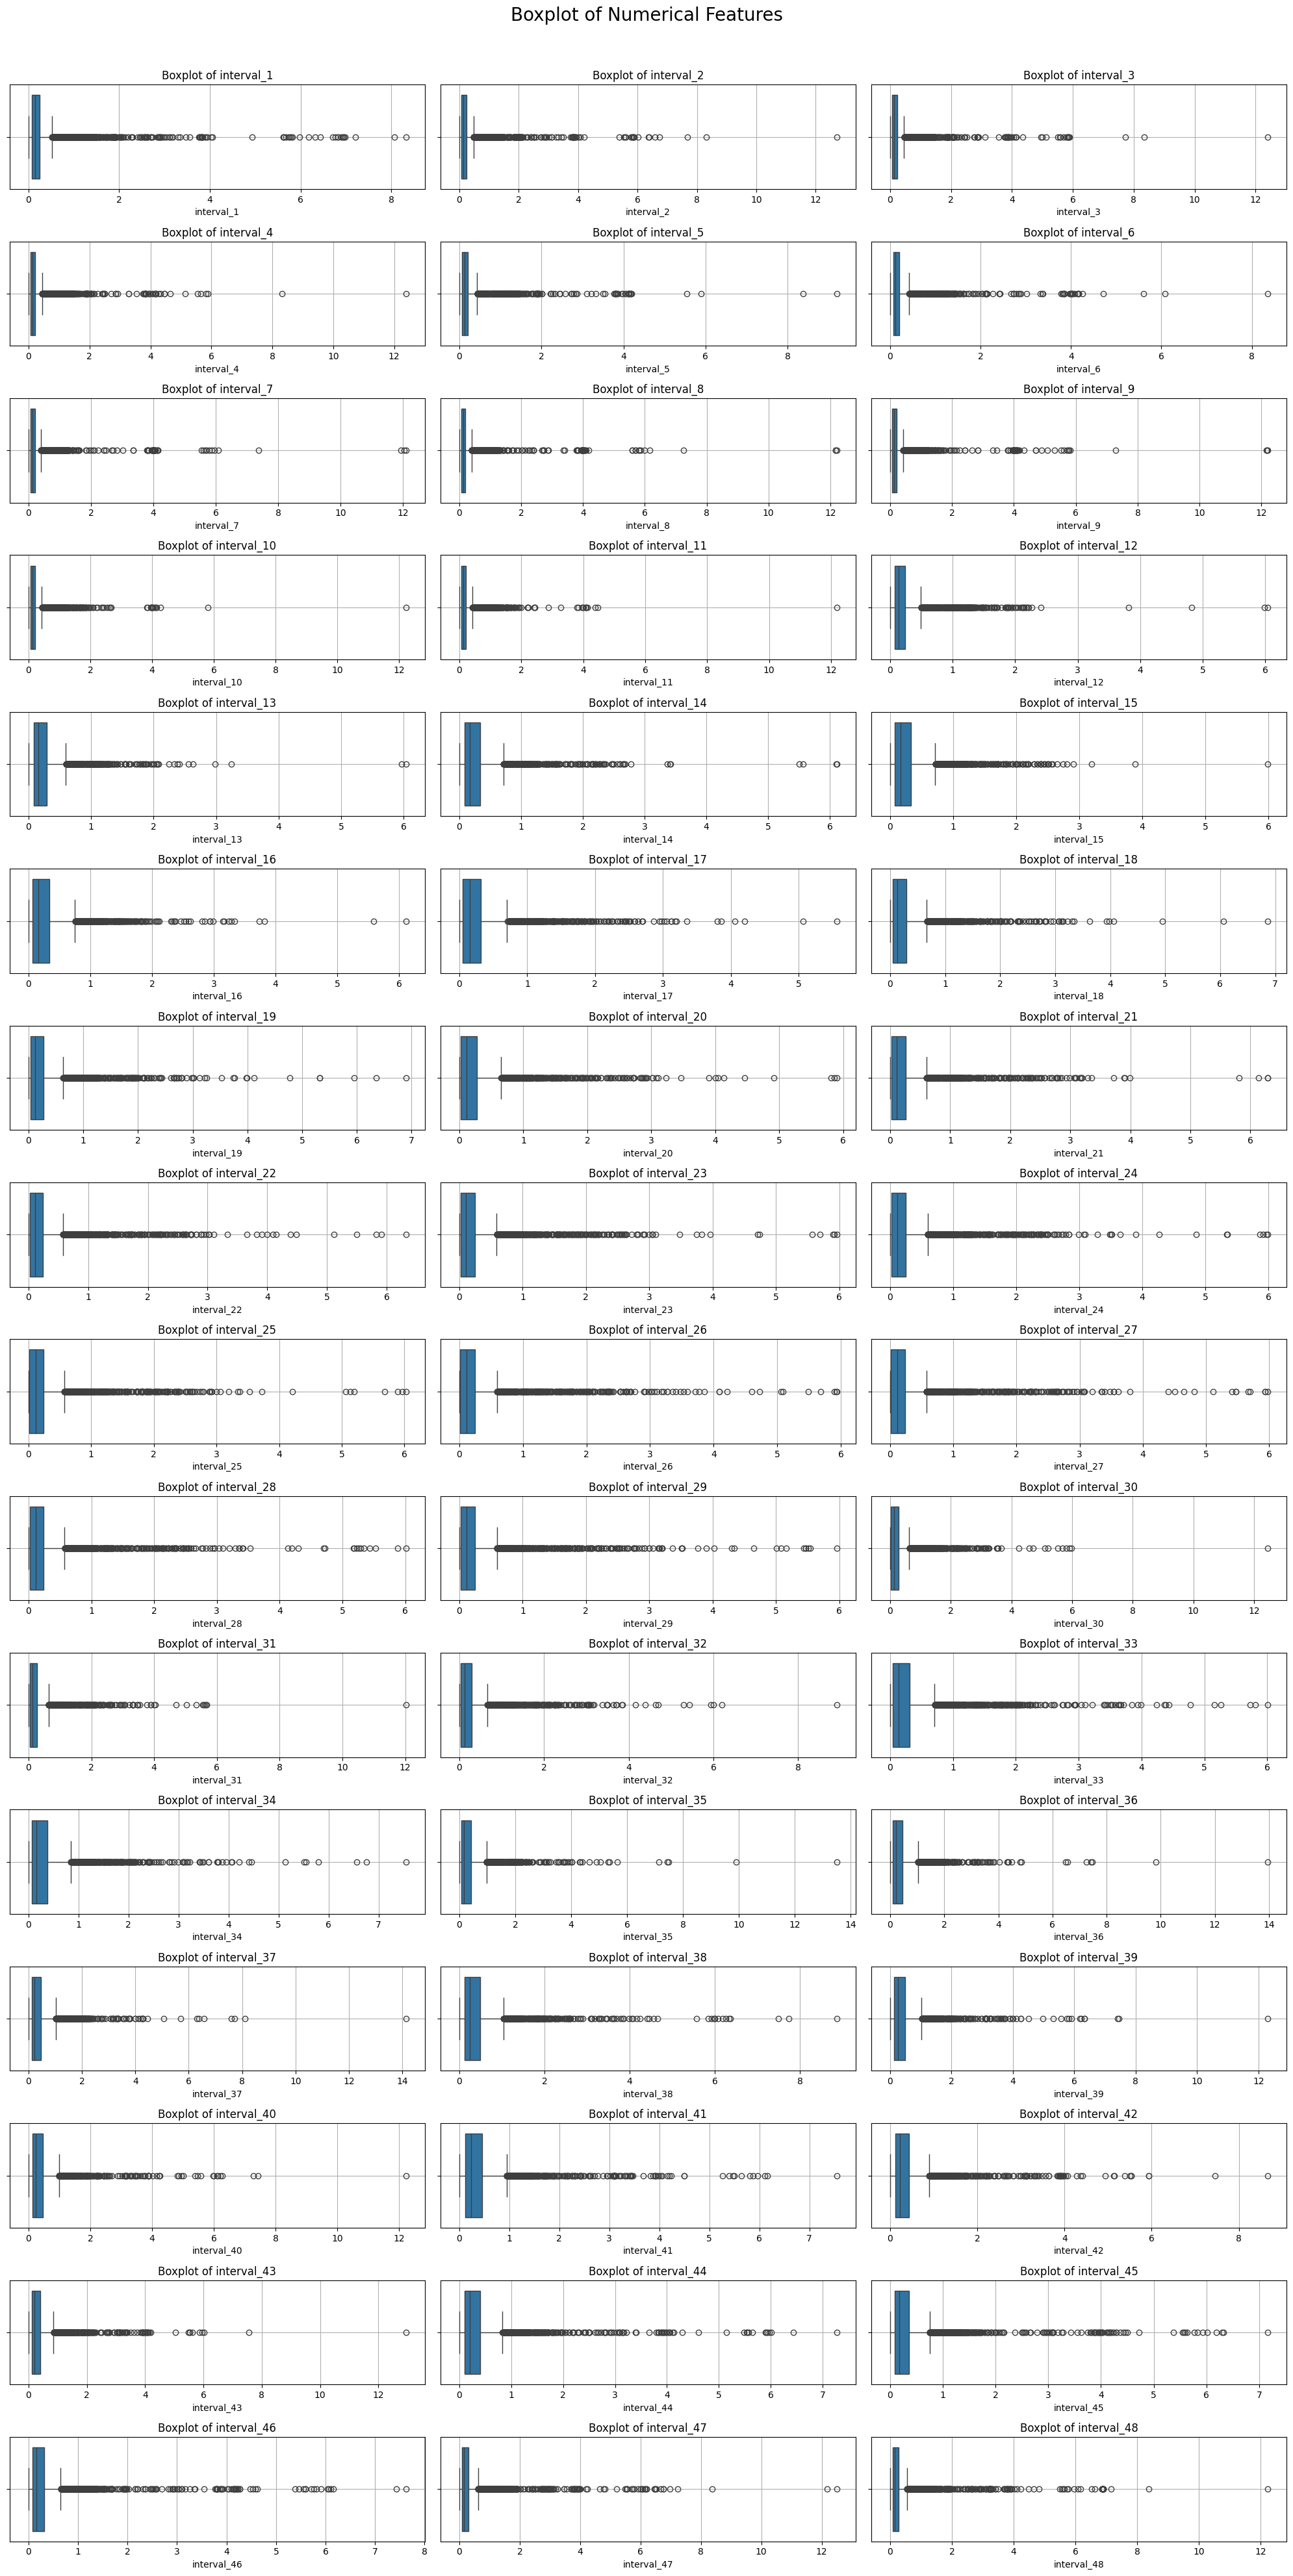

In [217]:
# Identifikasi Outliers Menggunakan Boxplot
plot_boxplot(initial_df, numerical_columns, 'Boxplot of Numerical Features')

## **Data Preparation**

### **Pemilihan Data**

#### **1. Record Selection**

Tidak dilakukan dengan asumsi semua data yang ada akan digunakan.

#### **2. Feature Selection**

In [218]:
numerical_columns = initial_df.select_dtypes(include=[np.float64]).columns
id_columns = ['id']
date_columns = ['read_date']
label_column = ['label']

X = initial_df[numerical_columns]
y = initial_df[label_column]
id_df = initial_df[id_columns]
date_df = initial_df[date_columns]

### **Perbaikan Data**

#### **1. Mengisi Missing Values**

Tidak dilakukan sebab tidak ada missing values.

#### **2. Penghapusan Duplikasi Data**
Tidak dilakukan sebab tidak ada duplikasi data.

#### **3. Penanganan Outliers**
Tidak dilakukan sebab outlier dapat memberikan informasi yang berharga.

#### **4. Perbaikan Error**

In [219]:
# Memperbaiki konsistensi format date

# Buat salinan DataFrame
df_errors_handled = initial_df.copy()

# Hilangkan bagian waktu dari kolom 'read_date' jika ada
df_errors_handled['read_date'] = df_errors_handled['read_date'].str.split(' ').str[0]

# Konversikan ke format datetime
df_errors_handled['read_date'] = pd.to_datetime(df_errors_handled['read_date'], format='%m/%d/%Y', errors='coerce')

# Gunakan .normalize() untuk mengatur waktu menjadi 00:00:00
df_errors_handled['read_date'] = df_errors_handled['read_date'].dt.normalize()

# Periksa hasil akhir
print(df_errors_handled.dtypes)

read_date      datetime64[ns]
interval_1            float64
interval_2            float64
interval_3            float64
interval_4            float64
interval_5            float64
interval_6            float64
interval_7            float64
interval_8            float64
interval_9            float64
interval_10           float64
interval_11           float64
interval_12           float64
interval_13           float64
interval_14           float64
interval_15           float64
interval_16           float64
interval_17           float64
interval_18           float64
interval_19           float64
interval_20           float64
interval_21           float64
interval_22           float64
interval_23           float64
interval_24           float64
interval_25           float64
interval_26           float64
interval_27           float64
interval_28           float64
interval_29           float64
interval_30           float64
interval_31           float64
interval_32           float64
interval_3

### **Konstruksi Data (Training Set & Testing Set)**

#### **1. Train-Test Split**

Memisahkan data menjadi data training dan data testing, untuk mencegah leakage.

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 3643
Jumlah data testing: 405


#### **2. Encoding Categorical Data**

Tidak dilakukan sebab data sudah dalam bentuk numerik.

#### **3. Feature Engineering**

Menggunakan teknik feature engineering dengan melakukan clustering menggunakan 2 metode yaitu KMeans dan BIRCH.

**Pipeline:** Means Grouping by id → PCA → CLustering

##### **a. Means Grouping by id**


In [221]:
# split the id column into training and testing sets
id_train, id_test = train_test_split(id_df, test_size=0.1, random_state=0, stratify=y)

In [222]:
# combine X_train and X_test and id_train and id_test
X_train_with_id = pd.concat([id_train, X_train], axis=1)
X_test_with_id = pd.concat([id_test, X_test], axis=1)

# Group by id and calculate the mean for each numerical column
X_grouped_train = X_train_with_id.groupby('id').mean()
X_grouped_test = X_test_with_id.groupby('id').mean()

# Reset the index to make 'id' a column again
X_grouped_train.reset_index(inplace=True)
X_grouped_test.reset_index(inplace=True)

display(HTML(X_grouped_train.head().to_html()))
display(HTML(X_grouped_test.head().to_html()))

,id,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,interval_11,interval_12,interval_13,interval_14,interval_15,interval_16,interval_17,interval_18,interval_19,interval_20,interval_21,interval_22,interval_23,interval_24,interval_25,interval_26,interval_27,interval_28,interval_29,interval_30,interval_31,interval_32,interval_33,interval_34,interval_35,interval_36,interval_37,interval_38,interval_39,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48
0,1,0.392812,0.361561,0.179393,0.154246,0.154849,0.153785,0.158663,0.158971,0.157444,0.102880,0.089912,0.162320,0.198295,0.183200,0.164915,0.099068,0.100434,0.104698,0.172232,0.145722,0.156229,0.230322,0.192820,0.120415,0.049229,0.043729,0.034437,0.067512,0.066295,0.057600,0.081995,0.088244,0.114461,0.154090,0.143727,0.177873,0.171773,0.159417,0.154854,0.142205,0.328332,0.303934,0.492044,0.469488,0.463083,0.464607,0.439461,0.438383
1,2,0.965924,0.820697,0.732379,0.593726,0.406721,0.332545,0.234353,0.141089,0.114947,0.111326,0.122018,0.251618,0.275468,0.177282,0.194542,0.187150,0.158371,0.127453,0.105905,0.064466,0.078113,0.058047,0.099166,0.152458,0.182061,0.081571,0.074000,0.098508,0.081732,0.096697,0.148008,0.214295,0.240447,0.324984,0.362150,0.388466,0.369224,0.286326,0.263955,0.266918,0.250637,0.264447,0.268561,0.244382,0.525626,0.813621,0.899155,1.049153
2,3,0.584198,0.594469,0.587621,0.580629,0.538674,0.498481,0.483164,0.419474,0.342379,0.286138,0.261731,0.305633,0.536286,0.538069,0.487326,0.495210,0.634793,0.409055,0.370810,0.335838,0.352950,0.370069,0.430183,0.425429,0.410540,0.390748,0.372748,0.433305,0.415300,0.451619,0.451764,0.439412,0.417974,0.464267,0.513814,0.466636,0.498036,0.592983,0.663664,0.644619,0.723631,0.662481,0.647895,0.603102,0.634495,0.561736,0.472290,0.422295
3,4,0.311192,0.348528,0.348697,0.349336,0.278979,0.255254,0.257033,0.250936,0.258310,0.254303,0.229141,0.191641,0.170005,0.179785,0.326733,0.428336,0.517605,0.655903,0.683308,0.586995,0.534910,0.452703,0.348215,0.296767,0.252697,0.193400,0.215038,0.244521,0.265359,0.221767,0.258628,0.352705,0.338751,0.385554,0.416003,0.378187,0.457026,0.476895,0.531541,0.502854,0.557182,0.719849,0.739400,0.720477,0.671610,0.497408,0.415359,0.457667
4,5,0.143392,0.145529,0.140600,0.134195,0.135832,0.136653,0.131392,0.134684,0.135668,0.127932,0.135005,0.155405,0.160505,0.139939,0.088955,0.078926,0.022682,0.031408,0.008716,0.005753,0.015295,0.005589,0.006082,0.014468,0.044071,0.059363,0.051632,0.059205,0.036834,0.040126,0.030092,0.048347,0.090782,0.117421,0.185508,0.300958,0.355568,0.382705,0.326626,0.321518,0.332866,0.325142,0.283368,0.241747,0.201126,0.193229,0.162971,0.148989


,id,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,interval_11,interval_12,interval_13,interval_14,interval_15,interval_16,interval_17,interval_18,interval_19,interval_20,interval_21,interval_22,interval_23,interval_24,interval_25,interval_26,interval_27,interval_28,interval_29,interval_30,interval_31,interval_32,interval_33,interval_34,interval_35,interval_36,interval_37,interval_38,interval_39,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48
0,1,0.064980,0.059960,0.066220,0.084980,0.073740,0.059980,0.064980,0.063720,0.061220,0.057480,0.082460,0.169980,0.201220,0.107480,0.126200,0.123720,0.127480,0.058720,0.073720,0.041220,0.037480,0.182480,0.194980,0.064980,0.036220,0.028740,0.037480,0.030000,0.056240,0.037480,0.062500,0.063740,0.162480,0.233720,0.279980,0.396220,0.303720,0.303720,0.246220,0.174980,0.147480,0.089960,0.078740,0.084980,0.073720,0.064980,0.061220,0.063720
1,2,0.768725,0.589025,0.555438,0.555462,0.478875,0.418725,0.188262,0.087475,0.124188,0.149987,0.082787,0.167150,0.179675,0.201538,0.217938,0.066388,0.088263,0.037475,0.100775,0.028100,0.105463,0.073438,0.061713,0.028112,0.024212,0.004688,0.006237,0.012500,0.095312,0.141387,0.042175,0.091387,0.329662,0.489025,0.585125,0.534350,0.459363,0.595300,0.498425,0.469512,0.421075,0.312475,0.282788,0.297625,0.631238,0.837475,0.912475,0.751550
2,3,1.043725,1.042150,1.053100,1.045275,1.037475,1.032800,1.023400,1.023400,1.046825,1.042150,1.028100,0.740600,0.645275,0.518725,0.409325,0.410900,0.300000,0.240575,0.412475,0.681200,0.284350,0.274975,0.570300,0.550000,0.228100,0.259350,0.374975,0.340600,0.278100,0.531225,0.534375,0.600000,0.287450,0.189050,0.264050,0.371850,0.399975,0.229650,1.203100,1.126550,1.685900,2.157800,2.043725,2.151525,2.498425,2.468725,2.042175,1.976525
3,4,0.683000,0.694614,0.675871,0.673186,0.668729,0.537457,0.141943,0.174086,0.183929,0.172286,0.157114,0.184786,0.174086,0.158900,0.158014,0.149971,0.241943,0.333029,0.353543,0.409800,0.323214,0.235686,0.226743,0.295500,0.190143,0.217843,0.266057,0.237486,0.180343,0.180329,0.156229,0.220514,0.257114,0.281214,0.272300,0.380329,0.342829,0.424986,0.542829,0.480329,0.470514,0.432129,0.416057,0.404457,0.369629,0.281214,0.195500,0.158000
4,5,0.121850,0.128087,0.137463,0.119512,0.129675,0.131225,0.122637,0.133575,0.125762,0.131225,0.129663,0.125762,0.181225,0.146863,0.075750,0.053887,0.002338,0.327325,0.444525,0.270313,0.041400,0.056250,0.021087,0.000000,0.025775,0.017175,0.003125,0.028125,0.006250,0.002338,0.002338,0.016400,0.005463,0.086700,0.077325,0.138250,0.190600,0.214825,0.251537,0.274987,0.257800,0.290600,0.272637,0.220275,0.219500,0.157000,0.166375,0.157012


##### **b. Principal Component Analysis (PCA) - Dimensionality Reduction**

In [223]:
# PCA X_grouped data with 4 components
columns_names_to_pca = X_grouped_train.columns.drop('id')
pca = FeatureDimensionReducer(method='pca', numeric_features_to_reduce=columns_names_to_pca)

X_pca_train = pca.fit_transform(X_grouped_train, threshold=0.95)
X_pca_test = pca.transform(X_grouped_test)

X_pca_train

Variance Ratio for each component: [5.97999596e-01 2.29374686e-01 5.61800562e-02 4.24597299e-02
 1.90328427e-02 1.41738018e-02 7.34362283e-03 6.80132388e-03
 5.60861552e-03 4.36988895e-03 2.98223696e-03 2.13764387e-03
 1.78159056e-03 1.44923910e-03 1.19919846e-03 8.86602897e-04
 7.09335243e-04 6.61618188e-04 6.29224612e-04 5.00778782e-04
 4.59271458e-04 4.18107562e-04 3.53236952e-04 3.07149064e-04
 2.79893613e-04 2.61313653e-04 2.50847489e-04 1.94915656e-04
 1.67652666e-04 1.41173393e-04 1.23724508e-04 1.07277442e-04
 9.77357179e-05 8.56564955e-05 7.71928918e-05 6.44888975e-05
 5.96873548e-05 5.13324710e-05 3.97390997e-05 3.37309185e-05
 3.30750709e-05 2.87092863e-05 1.86221248e-05 1.68680058e-05
 1.54697131e-05 1.25170021e-05 1.10133159e-05 7.96593394e-06]
Cumulative Variance Ratio: [0.5979996  0.82737428 0.88355434 0.92601407 0.94504691 0.95922071
 0.96656434 0.97336566 0.97897427 0.98334416 0.9863264  0.98846404
 0.99024563 0.99169487 0.99289407 0.99378068 0.99449001 0.99515163
 0.9

,id,component_1,component_2,component_3,component_4,component_5,component_6
0,1,-0.803264,0.435725,-0.071188,0.066271,0.331311,-0.278895
1,2,-0.070587,1.480572,-0.328994,-0.196996,-0.065874,0.026944
2,3,1.214502,0.163576,0.112634,0.121882,0.168127,0.170285
3,4,0.616512,-0.075902,-0.154446,0.330629,0.432833,-0.203359
4,5,-1.178961,0.087659,0.131939,0.274622,-0.111103,-0.010401
...,...,...,...,...,...,...,...
83,84,-0.545998,-0.392862,-0.121194,0.084257,0.029917,-0.002204
84,85,-0.895901,-0.599072,-0.292079,-0.371008,-0.302637,-0.139829
85,86,1.611186,-0.117840,0.353985,-0.290498,-0.014312,0.002938
86,87,0.087980,-0.243163,-0.078609,-0.007348,0.136554,-0.045367


##### **c. Clustering**

**Find Elbow**

In [224]:
class KMeans:
    def __init__(self, K=3, max_iters=100, random_state=42):
        self.K = K
        self.max_iters = max_iters
        self.random_state = random_state

        # List untuk menyimpan indeks sampel pada tiap cluster
        self.clusters = [[] for _ in range(self.K)]

        # List untuk menyimpan centroid (mean) dari tiap cluster
        self.centroids = []

    def fit(self, X):
        """
        Fit the KMeans model to the data.
        Parameters:
        - X: np.ndarray
            The input data to cluster.
        """
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # init centroid secara acak dari sampel dalam dataset
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples ke centroid terdekat
            self.clusters = self._create_clusters(self.centroids)

            # hitung centroid baru berdasarkan cluster
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # Periksa konvergensi (apakah centroid tidak berubah)
            if self._is_converged(centroids_old, self.centroids):
                break

    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.
        Parameters:
        - X: np.ndarray
            The input data to predict.
        Returns:
        - labels: np.ndarray
            Cluster labels for each sample in X.
        """
        labels = np.empty(X.shape[0])

        for idx, sample in enumerate(X):
            distances = [self.euclidean_distance(sample, centroid) for centroid in self.centroids]
            labels[idx] = np.argmin(distances)

        return labels.astype(int)

    def fit_predict(self, X):
        """
        Fit the KMeans model and return cluster labels.
        Parameters:
        - X: np.ndarray
            The input data to cluster.
        Returns:
        - labels: np.ndarray
            Cluster labels for each sample in X.
        """
        self.fit(X)
        return self.predict(X)

    # Fungsi untuk menghitung jarak euclidean
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    # Mendapatkan label cluster untuk tiap sampel berdasarkan assignment cluster.
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    # Membuat cluster dengan mengassign sampel ke centroid terdekat.
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    # Menentukan centroid terdekat untuk sebuah sampel.
    def _closest_centroid(self, sample, centroids):
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    # Mendapatkan centroid baru berdasarkan rata-rata nilai sampel dalam cluster.
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    # Periksa konvergensi dengan membandingkan centroid baru dan centroid lama.
    def _is_converged(self, centroids_old, centroids):
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0


In [225]:
def find_optimal_k(sse_values):
    """
    Find the optimal k using the elbow method by identifying the point of maximum curvature
    """
    # Calculate the differences and rate of change
    differences = np.diff(sse_values)
    differences_rate = np.diff(differences)
    
    # Find the elbow point (point of maximum curvature)
    elbow_index = np.argmax(np.abs(differences_rate)) + 2
    return elbow_index

def elbow_method(df, max_k=10):
    """
    Perform elbow method analysis and visualize results with optimal k highlighted.
    """
    # Standardize the features
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(df)
    
    # Calculate SSE for different values of k
    sse = []
    K = range(1, max_k + 1)
    
    for k in K:
        kmeans = KMeans(K=k, max_iters=100, random_state=42)
        
        # Use fit instead of predict to ensure centroids are initialized
        kmeans.fit(scaled_features)
        
        # Calculate SSE
        current_sse = 0
        for i, cluster in enumerate(kmeans.clusters):
            if len(cluster) > 0:  # Check if cluster is not empty
                cluster_points = scaled_features[cluster]
                centroid = kmeans.centroids[i]
                current_sse += np.sum((cluster_points - centroid) ** 2)
        
        sse.append(current_sse)
    
    # Find optimal k
    optimal_k = find_optimal_k(sse)
    
    # Create the visualization
    plt.figure(figsize=(12, 7))
    
    # Plot the elbow curve
    plt.plot(K, sse, 'bo-', linewidth=2, markersize=8, label='SSE curve')
    
    # Add vertical line at optimal k
    plt.axvline(x=optimal_k, color='red', linestyle='--', 
                label=f'Optimal k = {optimal_k}')
    
    # Highlight the optimal point
    plt.plot(optimal_k, sse[optimal_k - 1], 'ro', markersize=12)
    
    # Customize the plot
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
    plt.title('Elbow Method Analysis with Optimal k', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    
    # Add text annotation for optimal k
    plt.annotate(f'Optimal k = {optimal_k}',
                 xy=(optimal_k, sse[optimal_k - 1]),
                 xytext=(optimal_k + 0.5, sse[optimal_k - 1]),
                 fontsize=10,
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.tight_layout()
    plt.show()
    
    return sse, optimal_k


def analyze_clusters(df, optimal_k):
    """
    Perform clustering with the optimal k and return labeled data
    """
    # Standardize the features
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(df)
    
    # Initialize and fit KMeans model
    kmeans = KMeans(K=optimal_k, max_iters=100, random_state=42)
    kmeans.fit(scaled_features)
    
    # Predict cluster labels
    labels = kmeans.predict(scaled_features)
    
    # Return cluster labels and centroids
    return labels, kmeans.centroids


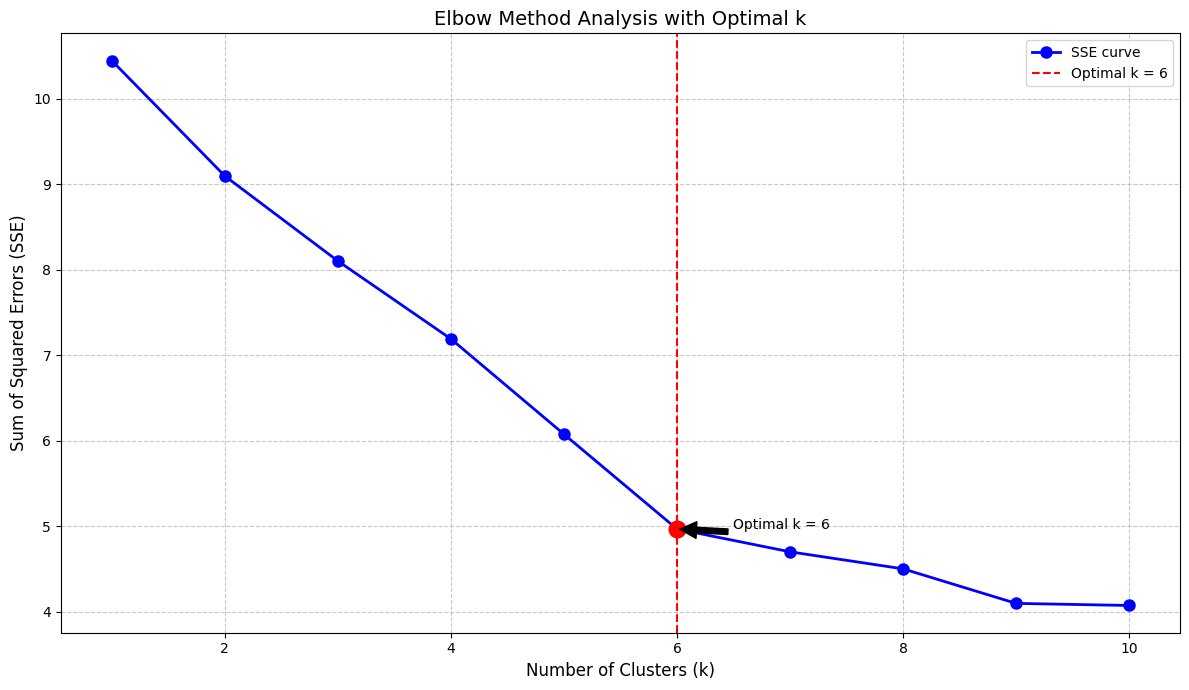

In [226]:
# find optimal k with df_pca_train without id columns
sse_values, optimal_k = elbow_method(X_pca_train.drop(columns=['id']), max_k=10)

# Analyze clusters with the optimal k
labels, centroids = analyze_clusters(X_pca_train.drop(columns=['id']), optimal_k)

In [227]:
# apply KMeans to X_pca_train and X_pca_test

# normalize the data before applying KMeans
scaler = MinMaxScaler()
X_pca_train_no_id = X_pca_train.drop(columns=['id']).values
X_pca_train_no_id_normalized = scaler.fit_transform(X_pca_train_no_id)

X_pca_test_no_id = X_pca_test.drop(columns=['id']).values
X_pca_test_no_id_normalized = scaler.transform(X_pca_test_no_id)

# Apply KMeans to X_pca_train
kmeans_train = KMeans(K=optimal_k, max_iters=100, random_state=0)

# Fit and predict labels for training data
train_labels = kmeans_train.fit_predict(X_pca_train_no_id_normalized)

# Add cluster labels back to the training DataFrame
X_pca_train_clustered = X_pca_train.copy()
X_pca_train_clustered['cluster_label'] = train_labels

# Apply KMeans to X_pca_test
test_labels = kmeans_train.predict(X_pca_test_no_id_normalized)

# Add cluster labels back to the testing DataFrame
X_pca_test_clustered = X_pca_test.copy()
X_pca_test_clustered['cluster_label'] = test_labels

# Display the updated DataFrames
display(HTML(X_pca_train_clustered.head().to_html()))
display(HTML(X_pca_test_clustered.head().to_html()))

,id,component_1,component_2,component_3,component_4,component_5,component_6,cluster_label
0,1,-0.803264,0.435725,-0.071188,0.066271,0.331311,-0.278895,4
1,2,-0.070587,1.480572,-0.328994,-0.196996,-0.065874,0.026944,4
2,3,1.214502,0.163576,0.112634,0.121882,0.168127,0.170285,0
3,4,0.616512,-0.075902,-0.154446,0.330629,0.432833,-0.203359,0
4,5,-1.178961,0.087659,0.131939,0.274622,-0.111103,-0.010401,4


,id,component_1,component_2,component_3,component_4,component_5,component_6,cluster_label
0,1,-1.347754,-0.233706,-0.026989,-0.050635,-0.164125,0.158928,4
1,2,-0.078586,1.230890,-0.234057,0.360507,-0.317658,0.090498,1
2,3,3.775210,2.696919,0.858920,1.771538,1.345780,-1.479880,5
3,4,0.093966,0.416977,-0.099729,-0.118007,-0.092776,0.105860,4
4,5,-1.233360,0.026045,0.075080,0.054438,0.202676,-0.084488,4


In [228]:
def visualize_clusters(df, labels=None, centroids=None, title="Cluster Visualization", dimensions=2):
    """
    Visualizes the dataset with clusters before or after KMeans clustering.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data (PCA-reduced features).
    - labels (np.ndarray, optional): The cluster labels for each data point. Default is None.
    - centroids (np.ndarray, optional): The centroids of the clusters. Default is None.
    - title (str): The title of the plot. Default is "Cluster Visualization".
    - dimensions (int): Whether to plot in 2D or 3D (choose 2 or 3). Default is 2.
    
    Returns:
    - None. Displays a scatter plot (2D or 3D based on input dimensions).
    """
    cluster_patches = []  # For legend
    
    # Use a vibrant colormap for clusters
    colormap = plt.cm.get_cmap('tab20', len(np.unique(labels)) if labels is not None else 20)
    
    if dimensions == 3 and df.shape[1] >= 3:
        # 3D Visualization
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        if labels is not None:
            # Color points by cluster label and create patches for legend
            scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],
                                 c=labels, cmap=colormap, s=100, alpha=0.9, edgecolors='k')
            
            unique_labels = np.unique(labels)
            for i, label in enumerate(unique_labels):
                cluster_patches.append(mpatches.Patch(color=colormap(i), 
                                                      label=f'Cluster {label}'))
        else:
            # Scatter without labels
            scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],
                                 color='gray', s=100, alpha=0.8, edgecolors='k')
        
        if centroids is not None:
            # Plot centroids
            ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
                       s=400, c='red', marker='X', edgecolors='k', label='Centroids')
            cluster_patches.append(mpatches.Patch(color='red', label='Centroids'))
        
        # Add labels and title
        ax.set_title(title, fontsize=16, fontweight='bold')
        ax.set_xlabel("Principal Component 1", fontsize=12, fontweight='bold')
        ax.set_ylabel("Principal Component 2", fontsize=12, fontweight='bold')
        ax.set_zlabel("Principal Component 3", fontsize=12, fontweight='bold')
        ax.legend(handles=cluster_patches, loc='best', fontsize=10)
        plt.show()
    
    else:
        # 2D Visualization
        plt.figure(figsize=(12, 9))
        
        if labels is not None:
            # Color points by cluster label and create patches for legend
            scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap=colormap, 
                                  s=100, alpha=0.9, edgecolors='k')
            
            unique_labels = np.unique(labels)
            for i, label in enumerate(unique_labels):
                cluster_patches.append(mpatches.Patch(color=colormap(i), 
                                                      label=f'Cluster {label}'))
        else:
            # Scatter without labels
            plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color='gray', s=100, alpha=0.8, edgecolors='k')
        
        if centroids is not None:
            # Plot centroids
            plt.scatter(centroids[:, 0], centroids[:, 1], s=400, c='red', marker='X', 
                        edgecolors='k', label='Centroids')
            cluster_patches.append(mpatches.Patch(color='red', label='Centroids'))
        
        # Add labels and title
        plt.title(title, fontsize=16, fontweight='bold')
        plt.xlabel("Principal Component 1", fontsize=12, fontweight='bold')
        plt.ylabel("Principal Component 2", fontsize=12, fontweight='bold')
        plt.legend(handles=cluster_patches, loc='best', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.8)
        plt.show()


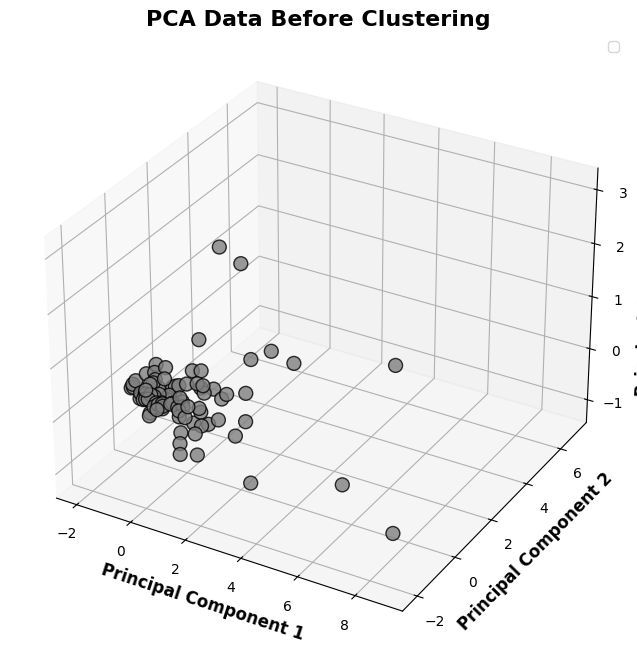

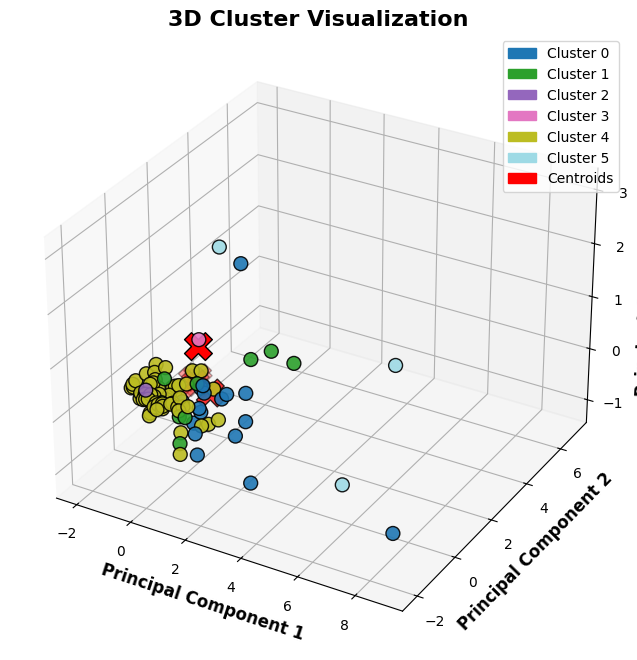

In [229]:
# Visualize raw PCA-reduced data
visualize_clusters(X_pca_train_clustered.drop(columns=['id']), title="PCA Data Before Clustering", dimensions=3)

# Visualize clusters with labels and centroids
visualize_clusters(X_pca_train_clustered.drop(columns=['id']), 
                   labels=X_pca_train_clustered['cluster_label'].values,
                   centroids=centroids,
                   title="3D Cluster Visualization",
                   dimensions=3)

In [230]:
# combine the cluster labels of each id to X_train_with_id and X_train_with_id

# Prepare the cluster labels
train_clusters = X_pca_train_clustered[['id', 'cluster_label']]
test_clusters = X_pca_test_clustered[['id', 'cluster_label']]

# Left join to ensure all ids from X_train_with_id and X_test_with_id are retained
X_train_with_clusters = pd.merge(X_train_with_id, train_clusters, on='id', how='left').drop(columns=['id'])
X_test_with_clusters = pd.merge(X_test_with_id, test_clusters, on='id', how='left').drop(columns=['id'])

X_train_with_clusters.head()

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,...,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,cluster_label
0,1.0375,1.0375,0.7937,0.0625,0.0562,0.0625,0.0562,0.0562,0.0625,0.0562,...,1.0312,1.0062,1.0437,1.0187,1.025,1.0375,1.0250,1.0375,1.0187,1
1,0.0312,0.1000,0.0375,0.0687,0.0625,0.0625,0.0562,0.0625,0.1375,0.1062,...,0.1937,0.1562,0.3750,0.1500,0.100,0.0625,0.0500,0.0562,0.0625,4
2,0.0990,0.0730,0.1300,0.1550,0.1290,0.1040,0.1090,0.1220,0.1000,0.0960,...,0.2310,0.1290,0.1090,0.1570,0.111,0.0950,0.1350,0.1250,0.0920,4
3,0.2670,0.1170,0.0840,0.0960,0.1090,0.0720,0.0970,0.0880,0.0830,0.0990,...,1.5150,1.3710,0.1210,0.0970,0.105,0.0840,0.1030,0.0950,0.0900,0
4,0.1937,0.1687,0.1687,0.1125,0.1125,0.1187,0.1062,0.1125,0.1000,0.0937,...,0.8750,0.2625,0.2062,0.2500,0.125,0.2812,0.4062,0.3125,0.3000,0


#### **4. Normalization**

In [231]:
feature_scaler = FeatureScaler()

# Fit the scaler on the training data
X_train_scaled = feature_scaler.fit_transform(X_train_with_clusters)
X_test_scaled = feature_scaler.transform(X_test_with_clusters)

Normal features (StandardScaler): []
Non-normal features (MinMaxScaler): ['interval_1', 'interval_2', 'interval_3', 'interval_4', 'interval_5', 'interval_6', 'interval_7', 'interval_8', 'interval_9', 'interval_10', 'interval_11', 'interval_12', 'interval_13', 'interval_14', 'interval_15', 'interval_16', 'interval_17', 'interval_18', 'interval_19', 'interval_20', 'interval_21', 'interval_22', 'interval_23', 'interval_24', 'interval_25', 'interval_26', 'interval_27', 'interval_28', 'interval_29', 'interval_30', 'interval_31', 'interval_32', 'interval_33', 'interval_34', 'interval_35', 'interval_36', 'interval_37', 'interval_38', 'interval_39', 'interval_40', 'interval_41', 'interval_42', 'interval_43', 'interval_44', 'interval_45', 'interval_46', 'interval_47', 'interval_48', 'cluster_label']


In [232]:
X_train_scaled

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,...,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,cluster_label
0,0.124625,0.081613,0.064008,0.005045,0.006109,0.007485,0.004645,0.004616,0.005123,0.004597,...,0.084352,0.133272,0.120485,0.078664,0.140893,0.144852,0.138047,0.124066,0.121636,0.2
1,0.003748,0.007866,0.003024,0.005546,0.006793,0.007485,0.004645,0.005133,0.011270,0.008687,...,0.015845,0.020689,0.043290,0.011583,0.013746,0.008726,0.006734,0.006720,0.007463,0.8
2,0.011892,0.005742,0.010484,0.012513,0.014022,0.012455,0.009008,0.010021,0.008197,0.007853,...,0.018896,0.017086,0.012583,0.012124,0.015258,0.013264,0.018182,0.014948,0.010985,0.8
3,0.032072,0.009204,0.006774,0.007750,0.011848,0.008623,0.008017,0.007228,0.006803,0.008098,...,0.123926,0.181589,0.013968,0.007490,0.014433,0.011728,0.013872,0.011360,0.010746,0.0
4,0.023267,0.013270,0.013605,0.009082,0.012228,0.014216,0.008777,0.009240,0.008197,0.007665,...,0.071575,0.034768,0.023804,0.019305,0.017182,0.039260,0.054707,0.037369,0.035821,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,0.015976,0.011170,0.009839,0.010817,0.015326,0.015329,0.010744,0.011663,0.010984,0.009816,...,0.018896,0.032318,0.025397,0.016525,0.019381,0.019127,0.016162,0.016741,0.016358,0.8
3639,0.083604,0.013845,0.008306,0.008315,0.009565,0.010898,0.006529,0.007474,0.018934,0.009898,...,0.033947,0.038808,0.024242,0.025174,0.037526,0.030017,0.120135,0.024275,0.017552,0.0
3640,0.007928,0.004641,0.004355,0.002664,0.003478,0.003832,0.002645,0.002793,0.002295,0.010225,...,0.018732,0.010066,0.026205,0.004865,0.013746,0.008796,0.006465,0.005620,0.005731,0.8
3641,0.015015,0.008850,0.008565,0.010091,0.011543,0.014216,0.009298,0.009240,0.009730,0.008687,...,0.049080,0.067046,0.058436,0.040054,0.064426,0.066318,0.059758,0.054553,0.054472,0.0


In [233]:
# X_train_scaled = X_train_scaled.drop(columns=['cluster_label'])
# X_test_scaled = X_test_scaled.drop(columns=['cluster_label'])

## **Modelling**

Menggunakan 2 pendekatan model yaitu, Logistic Regression dan K-Nearest Neighbors.

### **Proses Pelatihan**

In [234]:
import numpy as np


# Define Kelas untuk LogReg
class LogisticRegression():
    # Init konstruktor dengan params learning rate dan jumlah iterasi
    def __init__(self, lr=0.001, n_iters=200):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Define fungsi sigmoid
    def sigmoid(self, x):
        # Merubah input menjadi probabilitas di range (0,1)
        return 1/(1+np.exp(-x))

    # fit dengan data train 
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Loop untuk update parameter sebanyak n_iters
        for _ in range(self.n_iters):
            # hitung linear prediction
            linear_pred = np.dot(X, self.weights) + self.bias
            # masukkan ke sigmoid
            predictions = self.sigmoid(linear_pred)

           # cari gradien untuk weight dan bias (optimization)
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)
            
            # update weight dan bias
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

        return self

    # prediksi data test
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        # jika probabilitas > 0.5, maka kelas 1, jika tidak kelas 0
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
    


class KNearestNeighbors:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.
        
        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X, y):
        """
        Fit the model to the training data.
        
        Parameters:
        - X (np.ndarray): Feature matrix for training data.
        - y (np.ndarray): Labels for training data.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the class labels for the provided data.
        
        Parameters:
        - X (np.ndarray): Feature matrix for test data.
        
        Returns:
        - np.ndarray: Predicted class labels.
        """
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        """
        Predict the class label for a single data point.
        
        Parameters:
        - x (np.ndarray): A single test data point.
        
        Returns:
        - int: Predicted class label.
        """
        # Compute distances between x and all training samples
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Determine the most common label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _euclidean_distance(self, x1, x2):
        """
        Compute the Euclidean distance between two points.
        
        Parameters:
        - x1 (np.ndarray): First data point.
        - x2 (np.ndarray): Second data point.
        
        Returns:
        - float: Euclidean distance.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))


In [235]:
# Training with Logistic Regression
log_reg = LogisticRegression(lr=0.01, n_iters=1000)

# Fit the model to training data
log_reg.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test data
y_pred_logreg = log_reg.predict(X_test_scaled)

In [236]:
# Instantiate the KNN model
knn = KNearestNeighbors(k=5)

# Fit the model to the training data (including cluster_label)
knn.fit(X_train_scaled.values, y_train.values.ravel())

# Predict on the test data (including cluster_label)
y_pred_knn = knn.predict(X_test_scaled.values)

### **Proses Pengujian**

In [237]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plot a confusion matrix as a heatmap with counts and percentages.
    Args:
        y_true: Array-like of true labels.
        y_pred: Array-like of predicted labels.
        class_names: List of class names.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Calculate percentages

    # Combine counts and percentages into one display
    cm_display = np.empty_like(cm, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            cm_display[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=cm_display, fmt="", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.title("Confusion Matrix with Counts and Percentages", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [238]:
# Define class names (adjust based on your dataset)
class_names = ['Class 0', 'Class 1']

In [239]:
# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg):.4f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Model Evaluation:
Accuracy: 0.5877
Precision: 0.6522
Recall: 0.3713
F1-Score: 0.4732

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.80      0.66       203
           1       0.65      0.37      0.47       202

    accuracy                           0.59       405
   macro avg       0.61      0.59      0.57       405
weighted avg       0.61      0.59      0.57       405



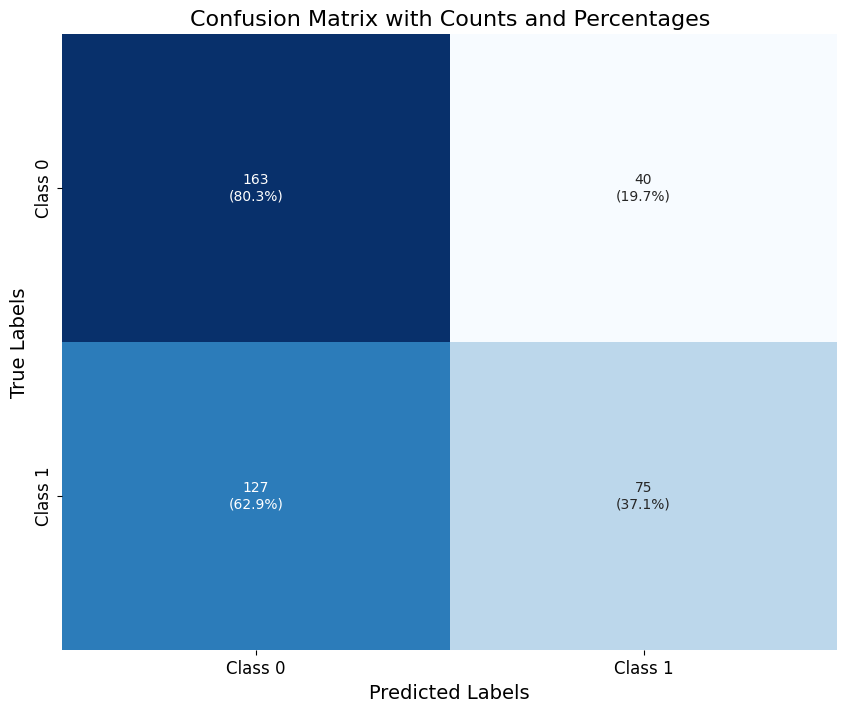

In [240]:
# Call the function to plot
plot_confusion_matrix(y_test, y_pred_logreg, class_names)

In [241]:
# Evaluate the model
print("K-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Model Evaluation:
Accuracy: 0.8296
Precision: 0.8595
Recall: 0.7871
F1-Score: 0.8217

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       203
           1       0.86      0.79      0.82       202

    accuracy                           0.83       405
   macro avg       0.83      0.83      0.83       405
weighted avg       0.83      0.83      0.83       405



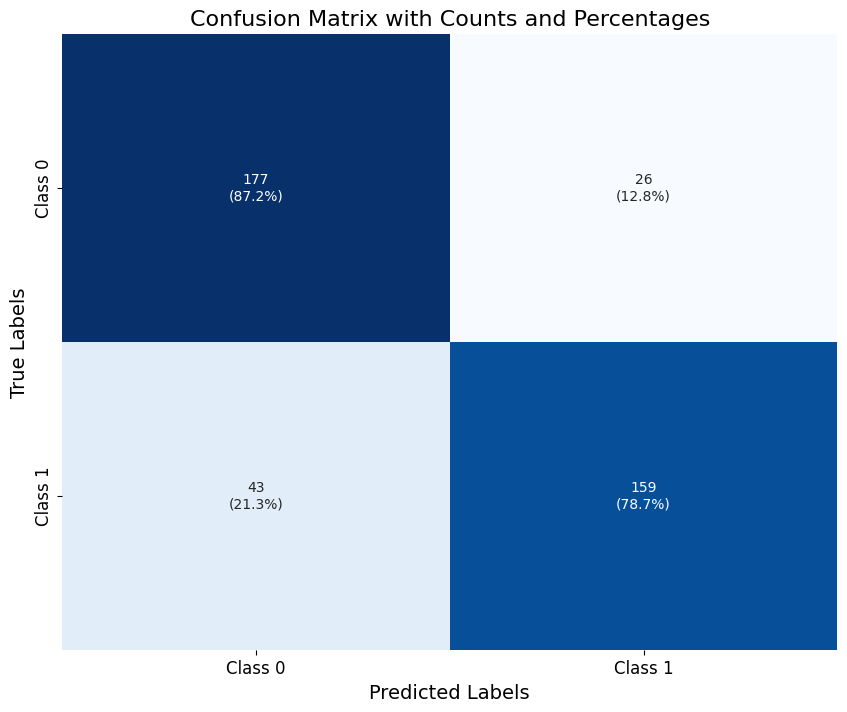

In [242]:
# Call the function to plot
plot_confusion_matrix(y_test, y_pred_knn, class_names)

## **Model Evaluation**

### **Mengukur Performansi Model**

### **Menilai Apakah Proses Sudah Maksimal (Room for Improvement)**